In [1]:
import sys
from typing import List
import numpy as np
import tables
import matplotlib.pyplot as plt
from phd.satellite.mean_table import Normilizer
# from scipy.interpolate import LinearNDInterpolator
# from scipy.interpolate import RegularGridInterpolator
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.stats import multivariate_normal
# from scipy.optimize import minimize
# from scipy.stats import norm

In [2]:

path = "/home/zelenyy/data/satellite/MCMC_electron/mcmc_electron.hdf5"

In [13]:
with tables.open_file(path) as h5file:
    table = h5file.get_node("/sim0321/deposit")
    print(repr(table.attrs))
    data = table.read()
    

/sim0321/deposit._v_attrs (AttributeSet), 21 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0.0,
    FIELD_0_NAME := 'event',
    NROWS := 10000,
    TITLE := 'Deposit in detector cell',
    VERSION := '2.7',
    path := 'sim0321',
    text := '/df/project test\n/df/gdml ../../satellite_anthracene.gdml\n/satellite/output file\n/satellite/detector single\n\n/gps/particle e-\n/gps/number 1\n/gps/direction -0.49999999999999994 0.0 -0.8660254037844387\n/gps/ene/mono 10.5 MeV\n/gps/position 0.07499999999999998 0. 0.22990381056766582 m\n/run/beamOn 10000\n',
    values_macros_dirX := -0.49999999999999994,
    values_macros_dirZ := -0.8660254037844387,
    values_macros_energy := 10.5,
    values_macros_mode := 'single',
    values_macros_number := 10000,
    values_macros_particle := 'e-',
    values_macros_posX := 0.07499999999999998,
    values_macros_posZ := 0.22990381056766582,
    values_macros_radius := 0.15,
    values_macros_shift := 0,
    values_macros_theta := 30.0,
    val

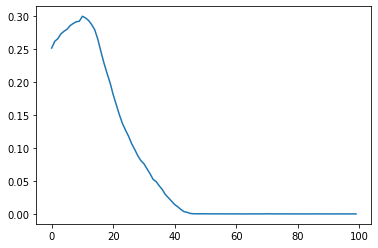

In [14]:
plt.plot(data['event'].mean(axis=0))

In [77]:
# path = "/mnt/storage2/phd/data/satellite/Anthracene/mean_anthracene.hdf5"




In [19]:
path = "/mnt/storage2/phd/data/satellite/polistyrene/proton.hdf5"
with tables.open_file(path) as h5file:
    data = h5file.get_node("/", "deposit").read()

In [20]:
points = np.zeros(shape=(data.size, 3))
points[:, 0] = data["energy"][:]
points[:, 1] = data["theta"][:]
points[:, 2] = data["shift"][:]
for i in range(3):
    temp = points[:, i]
    min_ = temp.min()
    max_ = temp.max()
    points[:, i] = (temp - min_)/(max_ - min_)

In [17]:
path = "/mnt/storage2/phd/data/satellite/polistyrene/mean_mesh.hdf5"
with tables.open_file(path) as h5file:
    mean = h5file.get_node("/proton", "mean").read()
    var = h5file.get_node("/proton", "variance").read()
    energy_node = h5file.get_node("/proton", "energy")
    energy = energy_node.read()
    energy_normilizer = Normilizer(energy_node.attrs["init"], step=energy_node.attrs["step"], norm=energy_node.attrs["norm"])
    theta = h5file.get_node("/proton", "theta").read()
    shift = h5file.get_node("/proton", "shift").read()


In [18]:
full_energy = mean.sum(axis=0)

In [21]:
ranges = data["mean"][:].argmin(axis=1)

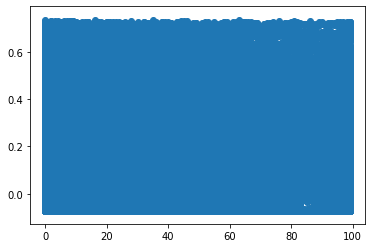

In [22]:
plt.scatter(ranges, full_energy)

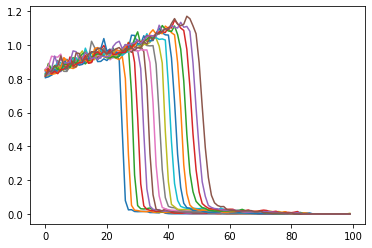

In [36]:
for i in range(16):
    plt.plot(mean[:, 100, 30, i])

In [29]:
ranges = data["mean"][:].argmin(axis=1)

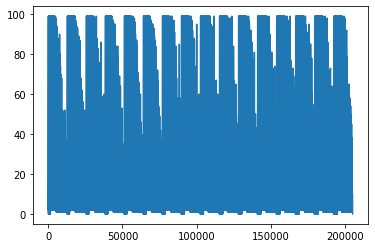

In [31]:
ranges.shape
plt.plot(ranges)

In [33]:
print(ranges[:10])

[2 2 2 2 3 3 3 4 4 4]


In [49]:
indx_ranges = ranges != 0.0

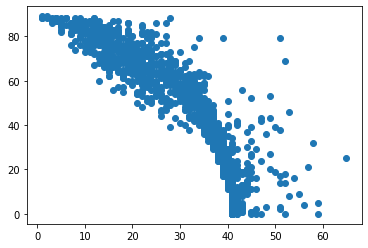

In [51]:
indx = np.logical_and(data["energy"] == 70.0, indx_ranges)
plt.scatter(ranges[indx], data["theta"][indx])

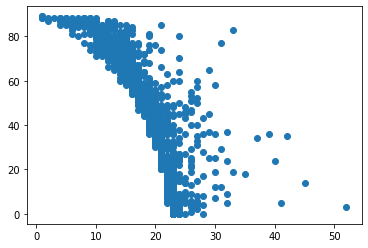

In [52]:
indx = np.logical_and(data["energy"] == 50.0, indx_ranges)
plt.scatter(ranges[indx], data["theta"][indx])

In [28]:
indx_empty = (mean[0] == 0)
ranges_mesh = (mean != 0.0).argmin(axis=0)
indx = np.logical_and(ranges_mesh == 0, np.logical_not(indx_empty))
ranges_mesh[indx] = 100

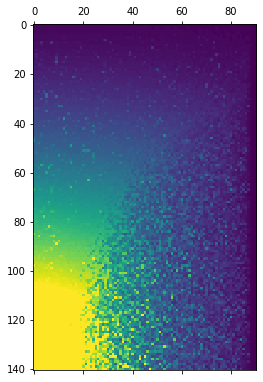

In [29]:
plt.matshow(ranges_mesh[:,:,0])


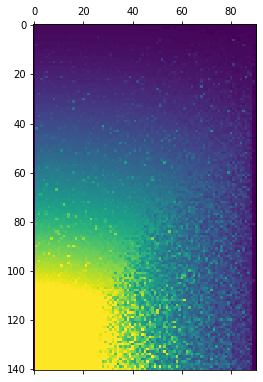

In [33]:
plt.matshow(ranges_mesh[:,:,-1])

In [67]:
print(ranges_mesh.shape)
print(ranges_mesh[:, 0, 0])

(141, 91, 16)
[  2   2   2   2   3   3   3   4   4   4   5   5   6   6   6   7   7  11
   8   9   9  10  10  11  12  12  13  13  14  15  19  16  17  17  18  19
  22  21  21  22  24  25  26  25  26  27  38  50  30  31  31  32  34  34
  35  36  37  39  39  40  47  43  43  50  47  48  49  65  51  51  53  53
  55  56  57  65  59  63  62  68  64  68  67  68  71  86  72  76  75  76
  80  79  81  82  84  89  86  87 100  90  92  93  94  96  97 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100]


In [68]:
# def theta_constrain(ranges_mesh, energy_indx, theta):
energy_indx = 50
range_mesh = ranges_mesh[energy_indx]
min_range = range_mesh.min(axis=1)
print(min_range.shape)

(91,)


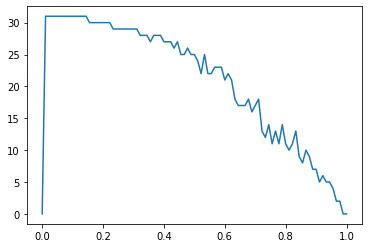

In [75]:
plt.plot(theta, min_range)

# Востановление

In [2]:
path = "/home/zelenyy/data/satellite/temp/reconstruction.hdf5"

In [3]:
with tables.open_file(path) as h5file:
    data = h5file.get_node("/", "proton_1").read()

In [6]:
path = "/mnt/storage2/phd/data/satellite/polistyrene/mean_mesh.hdf5"
with tables.open_file(path) as h5file:
    energy_node = h5file.get_node("/proton", "energy")
    energy_normilizer = Normilizer(energy_node.attrs["init"], step=energy_node.attrs["step"], norm=energy_node.attrs["norm"])

In [4]:
print(np.sum(data["success"])/data.shape[0])

0.9749014972419228


In [13]:
recon_energy = energy_normilizer.unnormalize(data["reconstructed"][:, 0])

In [14]:
original_energy = data["original"][:, 0]

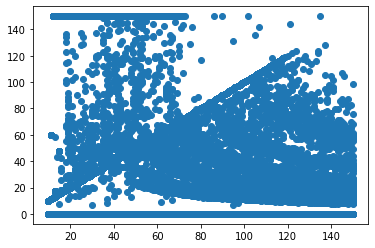

In [8]:
indx = data["success"]
plt.scatter(data["original"][indx, 0], recon_energy)

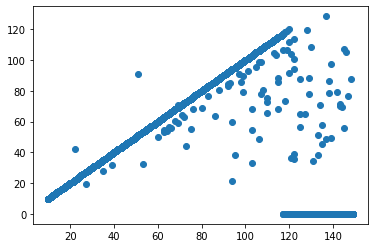

In [16]:

plt.scatter(original_energy[:1400], recon_energy[:1400])

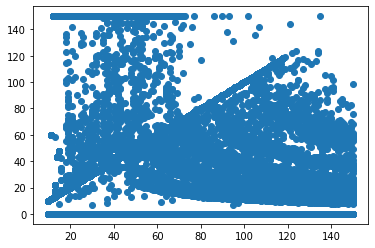

In [15]:
plt.scatter(original_energy[1400:], recon_energy[1400:])

In [19]:
diff = np.abs(original_energy[indx] - recon_energy[indx])/original_energy[indx]

NameError: name 'plthist' is not defined

(array([6855.,  176.,  185.,  160.,  172.,  193.,  247.,  256.,  341.,
         334.,  444.,  455.,  582.,  699.,  865., 1087., 1407., 1385.,
        1069.,   55.]),
 array([0.        , 0.04961339, 0.09922678, 0.14884017, 0.19845356,
        0.24806695, 0.29768034, 0.34729373, 0.39690712, 0.44652051,
        0.4961339 , 0.54574729, 0.59536068, 0.64497407, 0.69458746,
        0.74420085, 0.79381424, 0.84342763, 0.89304102, 0.94265441,
        0.9922678 ]),
 <a list of 20 Patch objects>)

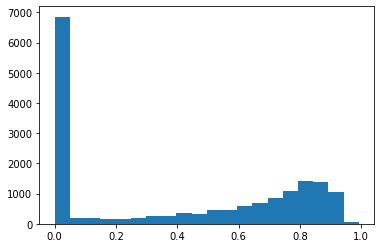

In [21]:
plt.hist(diff[diff < 1], bins = 20)

In [ ]:
plt.hist(diff)

In [22]:
np.sum(diff< 0.1)/diff.size



0.28420159236955905

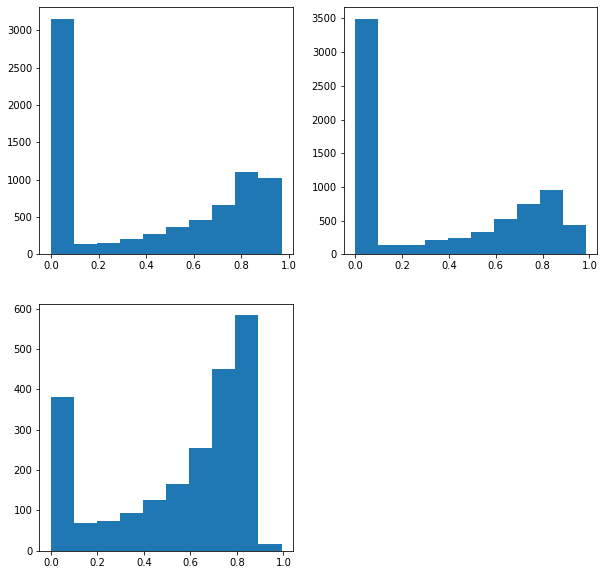

In [26]:
fig, ax = plt.subplots(figsize= (10, 10))
for i, shift in enumerate([0.0, 0.005, 0.016]):
    indx = data["original"][data["success"], 2] == shift
    plt.subplot(2,2,i+1)
    plt.hist(diff[indx][diff[indx]<1])
